In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='bert-base-uncased'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'g':[]}

In [4]:
gamma = [2,4,8,16]
lr = 5.0e-5

for g in gamma:
    print(f'Grid search {model_checkpoint}, learning rate {lr}, focal loss gamma {g}')
    data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=0.0,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       focalloss=True,
                                                       gamma=g,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['g'].append(g)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search bert-base-uncased, learning rate 5e-05, focal loss gamma 2


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	13.4449	Val Loss:	1.6585	Accuracy:	0.4675	F1:	0.4318
2 / 30: Train Loss:	7.1400	Val Loss:	1.3189	Accuracy:	0.5296	F1:	0.5130
3 / 30: Train Loss:	3.1724	Val Loss:	1.0869	Accuracy:	0.6391	F1:	0.6098
4 / 30: Train Loss:	1.4263	Val Loss:	1.0559	Accuracy:	0.6243	F1:	0.6173
5 / 30: Train Loss:	0.6551	Val Loss:	0.9668	Accuracy:	0.6479	F1:	0.6242
6 / 30: Train Loss:	0.3872	Val Loss:	0.8870	Accuracy:	0.7160	F1:	0.6957
7 / 30: Train Loss:	0.1935	Val Loss:	0.9408	Accuracy:	0.6746	F1:	0.6539
8 / 30: Train Loss:	0.1440	Val Loss:	0.8559	Accuracy:	0.7101	F1:	0.6736
9 / 30: Train Loss:	0.0857	Val Loss:	0.7995	Accuracy:	0.7604	F1:	0.7126
10 / 30: Train Loss:	0.0817	Val Loss:	0.8149	Accuracy:	0.7278	F1:	0.6825
11 / 30: Train Loss:	0.0517	Val Loss:	0.8061	Accuracy:	0.7367	F1:	0.6956
12 / 30: Train Loss:	0.0531	Val Loss:	0.8128	Accuracy:	0.7337	F1:	0.6999
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	10.8387	Val Loss:	1.7369	Accuracy:	0.4408	F1:	0.4180
2 / 30: Train Loss:	5.4780	Val Loss:	1.3862	Accuracy:	0.5592	F1:	0.5182
3 / 30: Train Loss:	2.3549	Val Loss:	1.1135	Accuracy:	0.6479	F1:	0.6171
4 / 30: Train Loss:	0.9123	Val Loss:	1.1000	Accuracy:	0.6213	F1:	0.6267
5 / 30: Train Loss:	0.4256	Val Loss:	0.9240	Accuracy:	0.7219	F1:	0.6917
6 / 30: Train Loss:	0.1870	Val Loss:	0.9267	Accuracy:	0.7101	F1:	0.6707
7 / 30: Train Loss:	0.0913	Val Loss:	0.9330	Accuracy:	0.6982	F1:	0.6535
8 / 30: Train Loss:	0.0505	Val Loss:	0.8512	Accuracy:	0.7337	F1:	0.6957
9 / 30: Train Loss:	0.0263	Val Loss:	0.8384	Accuracy:	0.7456	F1:	0.7130
10 / 30: Train Loss:	0.0159	Val Loss:	0.8423	Accuracy:	0.7278	F1:	0.6947
11 / 30: Train Loss:	0.0112	Val Loss:	0.8248	Accuracy:	0.7278	F1:	0.6938
12 / 30: Train Loss:	0.0086	Val Loss:	0.8313	Accuracy:	0.7396	F1:	0.7120
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	6.3548	Val Loss:	1.6908	Accuracy:	0.5207	F1:	0.4903
2 / 30: Train Loss:	2.5440	Val Loss:	1.5571	Accuracy:	0.4645	F1:	0.4481
3 / 30: Train Loss:	0.9453	Val Loss:	1.2740	Accuracy:	0.5888	F1:	0.5943
4 / 30: Train Loss:	0.2855	Val Loss:	1.1818	Accuracy:	0.6243	F1:	0.6266
5 / 30: Train Loss:	0.1368	Val Loss:	1.0624	Accuracy:	0.6982	F1:	0.6637
6 / 30: Train Loss:	0.0598	Val Loss:	1.0615	Accuracy:	0.6953	F1:	0.6537
7 / 30: Train Loss:	0.0339	Val Loss:	1.0159	Accuracy:	0.7071	F1:	0.6680
8 / 30: Train Loss:	0.0194	Val Loss:	0.9995	Accuracy:	0.7219	F1:	0.6824
9 / 30: Train Loss:	0.0244	Val Loss:	1.0325	Accuracy:	0.6775	F1:	0.6444
10 / 30: Train Loss:	0.0156	Val Loss:	0.9781	Accuracy:	0.7041	F1:	0.6714
11 / 30: Train Loss:	0.0083	Val Loss:	0.9614	Accuracy:	0.7249	F1:	0.6906
12 / 30: Train Loss:	0.0062	Val Loss:	0.9555	Accuracy:	0.7219	F1:	0.6855
13 / 30: Train Loss:	0.0051	Val Loss:	0.9415	Accuracy:	0.7189	F1:	0.6843
14 / 30: Train Loss:	0.0100	Val Loss:	0.9483	Accuracy:	0.733

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	2.4019	Val Loss:	1.8246	Accuracy:	0.3698	F1:	0.3848
2 / 30: Train Loss:	0.6797	Val Loss:	1.5134	Accuracy:	0.5917	F1:	0.5539
3 / 30: Train Loss:	0.2118	Val Loss:	1.3720	Accuracy:	0.6124	F1:	0.5752
4 / 30: Train Loss:	0.0693	Val Loss:	1.2829	Accuracy:	0.6805	F1:	0.6630
5 / 30: Train Loss:	0.0343	Val Loss:	1.2600	Accuracy:	0.6923	F1:	0.6707
6 / 30: Train Loss:	0.0151	Val Loss:	1.2066	Accuracy:	0.7130	F1:	0.6881
7 / 30: Train Loss:	0.0089	Val Loss:	1.1783	Accuracy:	0.6923	F1:	0.6703
8 / 30: Train Loss:	0.0053	Val Loss:	1.1657	Accuracy:	0.7071	F1:	0.6768
9 / 30: Train Loss:	0.0037	Val Loss:	1.1542	Accuracy:	0.6953	F1:	0.6664
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.67      0.75      0.70        67
               anecdote       0.87      0.79      0.83        43
         cherry picking       0.68      0.80      0.74        56
   

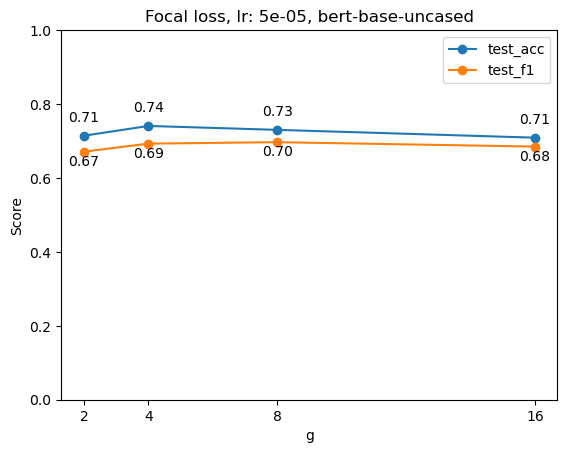

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'Focal loss, lr: {lr}, {model_checkpoint}',
                        column='g',
                        sci_format=False)

In [6]:
%reset -f